# Part 1a) A very simple 1D toy fit of  $m_{\rm BC}$

Pythonic way to grab ROOT modules without polluting namespace

In [1]:
import ROOT as r

Welcome to JupyROOT 6.08/02


## Independent variables

tab completion and docs (&#x2764; the docs)

In [2]:
r.RooRealVar?


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
mBC = r.RooRealVar('mbc', 'm_{BC}', 5.1, 5.3, 'GeV/c^{2}')

In [4]:
plot = mBC.frame() # creates a RooPlot object (set of axis) 

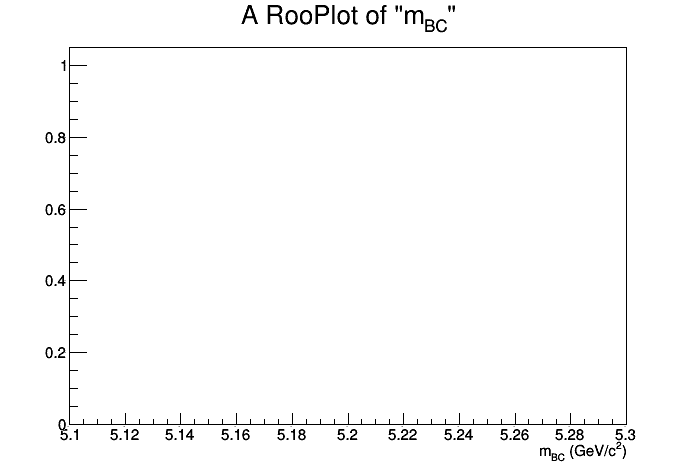

In [5]:
# let's just draw the (empty) axes
canvas = r.TCanvas()
plot.Draw()
canvas.Draw()

## Parameters

Let's make a very simple model of the beam constrained mass for signal decays of a $B^{0}$ meson

In [6]:
mB0 = r.RooRealVar('mB0', 'm_{B^0}', 5.280, 'GeV/c^{2}')      # the mass of the B0 meson
gB0 = r.RooRealVar('gB0', '#Gamma_{B^0}', 0.007, 0.0, 0.01, 'GeV/c^{2}')   # the width of the B0 meson

## Now choose a pdf to describe what we expect

In [7]:
r.RooGaussian?

In [8]:
crappy_model = r.RooGaussian('crappy_model', 'simple model', mBC, mB0, gB0)

In [9]:
crappy_model.plotOn(plot)

<ROOT.RooPlot object ("frame_mbc_7fc9488b7a70") at 0x7fc9488b7a70>

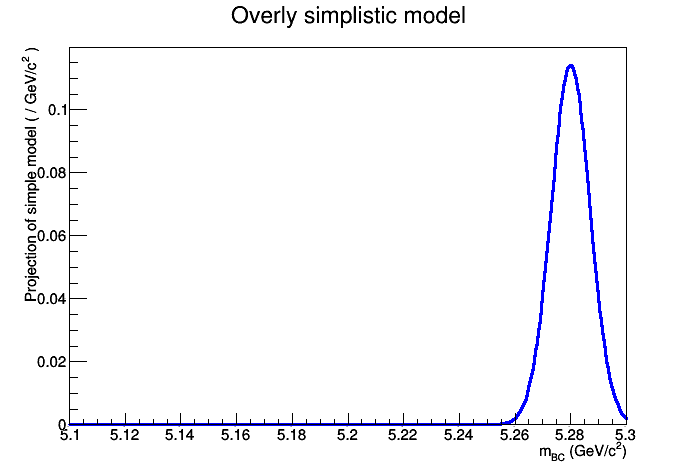

In [10]:
plot.SetTitle("Overly simplistic model")
canvas.cd()
plot.Draw()
canvas.Draw()

This isn't a great model, for a number of reasons. But it kinda looks right. Which is always a good start.

## A quick fit of some fake data

One thing you'll do quite often is just test how well behaved your model is. Everyone calls this 'toys'. Really it's MC but we want to distinguish between this and detector simulated data.

In [11]:
dataset = crappy_model.generate(r.RooArgSet(mBC), 1000) # returns a RooDataSet
dataset.Print()

RooDataSet::crappy_modelData[mbc] = 1000 entries


This is not going to work quite how we want, but lets do it anyway.

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 1000 will supercede previous event count of 1 for normalization of PDF projections


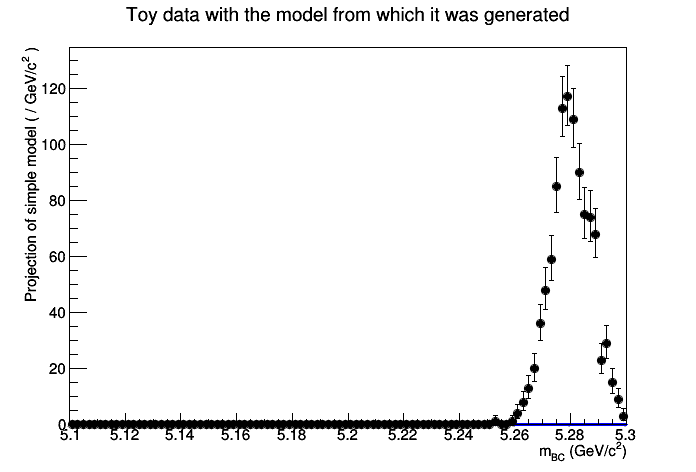

In [12]:
plot.SetTitle("Toy data with the model from which it was generated")
dataset.plotOn(plot)
plot.Draw()
canvas.Draw()

So order of `plotOn` commands matters. Data set first so I knows how to normalise. Want to reorder the plotting. This seems like a good opportunity to point out that all `RooObject`s have a Print method that is pretty informative.

In [13]:
plot.Print()

frame_mbc_7fc9488b7a70[mbc] = (RooCurve::crappy_model_Norm[mbc],RooHist::h_crappy_modelData)


frame_mbc_7fc9488b7a70[mbc] = (RooCurve::crappy_model_Norm[mbc],RooHist::h_crappy_modelData,RooCurve::crappy_model_Norm[mbc])


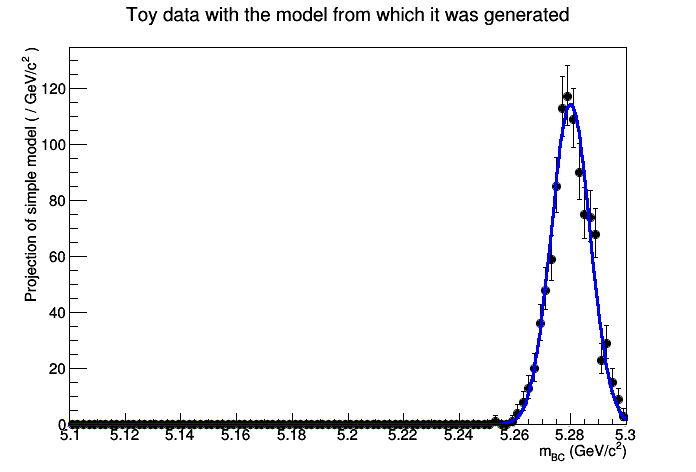

In [14]:
plot.setInvisible('crappy_model_Norm[mbc]')
crappy_model.plotOn(plot)
plot.Print()
plot.Draw()
canvas.Draw()

But that's just drawing one thing on top of the other. To run a fit, simply.. call `RooAbsPdf::fitTo(RooDataSet)`.

In [15]:
crappy_model.fitTo(dataset)

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 gB0          7.00000e-03  1.00000e-03    0.00000e+00  1.00000e-02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=-3518.21 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FI

Now the parameter (only one in this case) has a 'fitted' value. Which is the default. We draw the pdf now, and it will look slightly different....

In [16]:
crappy_model.plotOn(plot, r.RooFit.LineColor(r.kRed))

<ROOT.RooPlot object ("frame_mbc_7fc9488b7a70") at 0x7fc9488b7a70>

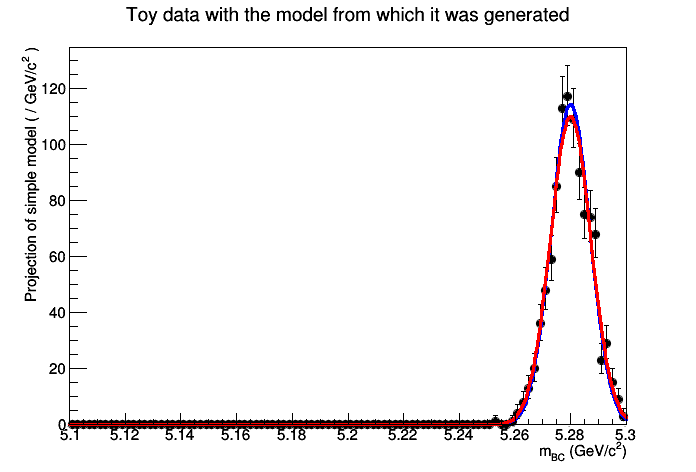

In [17]:
plot.Draw()
canvas.Draw()